2024-04-22 23:49:28.390 Python[51618:2270347] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


NCC Score: 1.6378315115800914


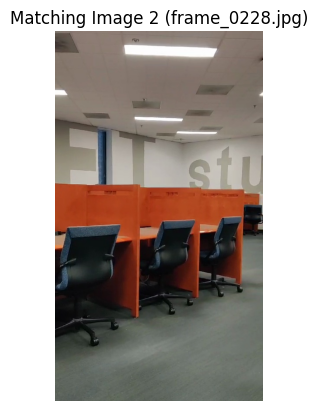

NCC Score: 3.090181745766289


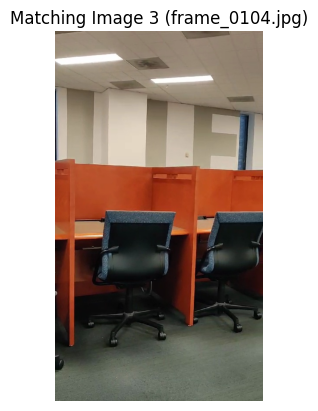

NCC Score: 6.954624655136722


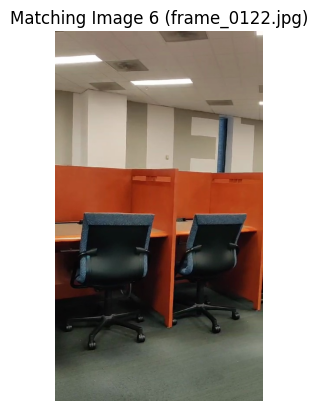

NCC Score: 1.955508788564245


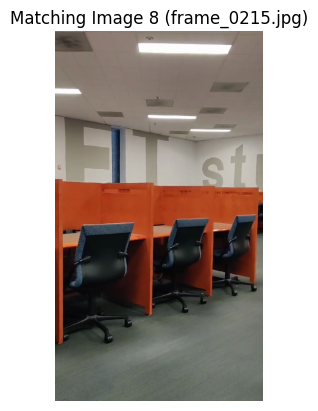

NCC Score: 3.320804942778488


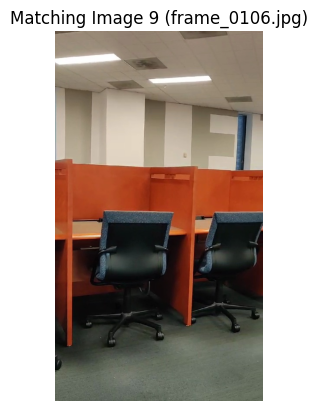

In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# Function to calculate Normalized Cross-Correlation (NCC)
def ncc(img1, img2):
    return np.sum(img1 * img2) / (np.sqrt(np.sum(np.square(img1))) * np.sqrt(np.sum(np.square(img2))))

# Path to the video file
video_path = "SampleVideo.mp4"

# Output folder for storing frames
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)

# Read and store all frames from the video
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(os.path.join(output_folder, f"frame_{frame_count:04d}.jpg"), frame)
    frame_count += 1

# Select ROI from the first frame
first_frame = cv2.imread(os.path.join(output_folder, "frame_0000.jpg"))
gray_first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
roi = cv2.selectROI(gray_first_frame)
cv2.destroyAllWindows()

# Check if ROI selection is valid
if roi[2] == 0 or roi[3] == 0:
    print("Invalid ROI selection. Please try again.")
    exit()

# Crop the selected region from the first frame
roi_template = gray_first_frame[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])]

# Randomly select 10 images for comparison
image_folder = "frames"
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, min(10, len(image_files)))

# Threshold for NCC score to consider a match
ncc_threshold = 1.5  # Adjust according to your needs

# Compare the ROI template with each randomly selected image using NCC
for i, image_name in enumerate(random_images):
    image = cv2.imread(os.path.join(image_folder, image_name))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find the region of interest in the image
    roi_image = gray_image[int(roi[1]):int(roi[1] + roi[3]), int(roi[0]):int(roi[0] + roi[2])]

    # Compute NCC score
    ncc_score = ncc(roi_template, roi_image)
    
    # Display matching images
    if ncc_score > ncc_threshold:
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Matching Image {i+1} ({image_name})")
        print(f"NCC Score: {ncc_score}")
        plt.axis('off')
        plt.show()
